In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("Leads.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [5]:
df.shape

(9240, 37)

In [6]:
#checking for null values
((df.isnull().sum())/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [7]:
df['Lead Quality'].value_counts()

Lead Quality
Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: count, dtype: int64

In [8]:
# fill null valus with "unknown"
df['Lead Quality']=df['Lead Quality'].fillna('unknown')

In [9]:
df=df.drop(['Asymmetrique Profile Index','Asymmetrique Activity Score','Asymmetrique Profile Score'],axis=1)

In [10]:
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [11]:
df['Asymmetrique Activity Index'].value_counts()

Asymmetrique Activity Index
02.Medium    3839
01.High       821
03.Low        362
Name: count, dtype: int64

In [12]:
#replace null value with 4 and then replace High with 1, medium with 2 and low with 3
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna(4)

In [13]:
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].map({'03.Low':3,'02.Medium':2,'01.High':1})

In [14]:
df['Asymmetrique Activity Index']=df['Asymmetrique Activity Index'].fillna(4)

In [15]:
df['Asymmetrique Activity Index'].isnull().sum()

0

In [16]:
#columns with null value more than 15, fill null values with unknown
((df.isnull().sum())/df.shape[0])*100

Prospect ID                                       0.000000
Lead Number                                       0.000000
Lead Origin                                       0.000000
Lead Source                                       0.389610
Do Not Email                                      0.000000
Do Not Call                                       0.000000
Converted                                         0.000000
TotalVisits                                       1.482684
Total Time Spent on Website                       0.000000
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Search                                            0.0000

In [17]:
cols=((df.isnull().sum())/df.shape[0])*100
cols=cols[cols>15]
cols

Country                                          26.634199
Specialization                                   15.562771
How did you hear about X Education               23.885281
What is your current occupation                  29.112554
What matters most to you in choosing a course    29.318182
Tags                                             36.287879
Lead Profile                                     29.318182
City                                             15.367965
dtype: float64

In [18]:
cols=cols.index.tolist()
print(type(cols))

<class 'list'>


In [19]:
for i in cols:
    df[i]=df[i].fillna('unknown')

In [20]:
((df.isnull().sum())/df.shape[0])*100

Prospect ID                                      0.000000
Lead Number                                      0.000000
Lead Origin                                      0.000000
Lead Source                                      0.389610
Do Not Email                                     0.000000
Do Not Call                                      0.000000
Converted                                        0.000000
TotalVisits                                      1.482684
Total Time Spent on Website                      0.000000
Page Views Per Visit                             1.482684
Last Activity                                    1.114719
Country                                          0.000000
Specialization                                   0.000000
How did you hear about X Education               0.000000
What is your current occupation                  0.000000
What matters most to you in choosing a course    0.000000
Search                                           0.000000
Magazine      

In [21]:
df.shape

(9240, 34)

In [22]:
df=df.dropna()

In [23]:
df.shape

(9074, 34)

In [24]:
# 166rows are dropped with null vlues
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [25]:
df=df.drop(['Prospect ID'],axis=1)

In [26]:
#get list of object cols, convert them to numericals

In [27]:
objectcols=df.select_dtypes(include='object').columns
objectcols

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [28]:
objectcols=list(objectcols)

In [29]:
df['Converted'].value_counts()

Converted
0    5639
1    3435
Name: count, dtype: int64

In [30]:
Convertedpercent = (sum(df['Converted'])/len(df['Converted'].index))*100
Convertedpercent

37.85541106458012

### Conversion rate is approve 38%

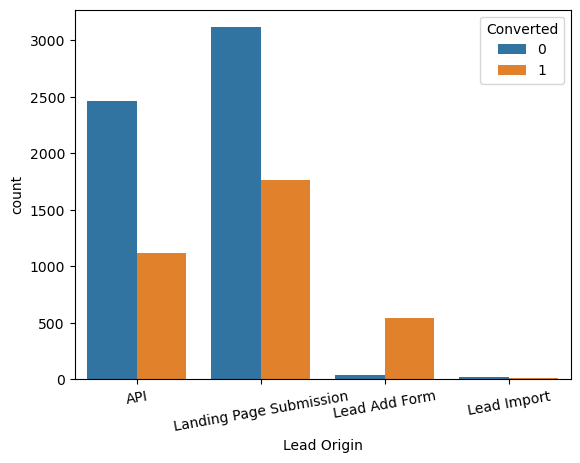

In [31]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = df)
plt.xticks(rotation = 10)
plt.show()

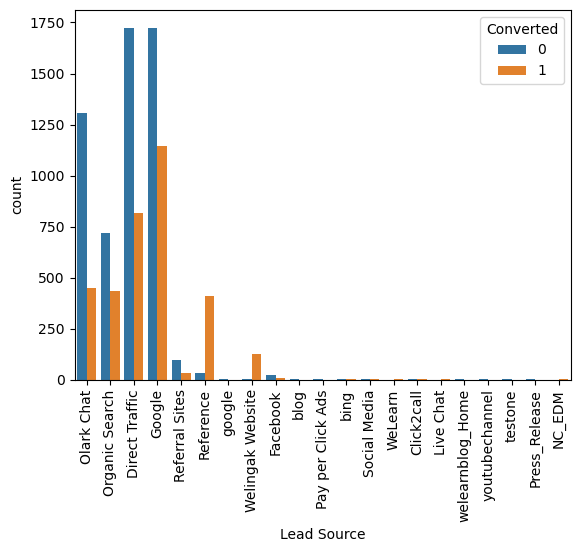

In [32]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [33]:
# Need to replace 'google' with 'Google'
df['Lead Source'] = df['Lead Source'].replace(['google'], 'Google')

In [34]:
# Creating a new category 'Others' for some of the Lead Sources that have extremely less values.
df['Lead Source'] = df['Lead Source'].replace(['blog', 'Pay per Click Ads', 'bing', 'Social Media','WeLearn','Click2call', 'Live Chat', 
     'welearnblog_Home', 'youtubechannel', 'testone','Press_Release', 'NC_EDM'], 'Others')

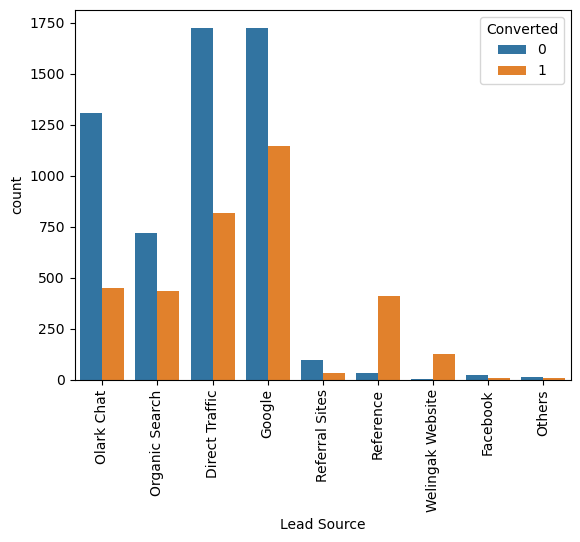

In [35]:
sns.countplot(x = "Lead Source", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

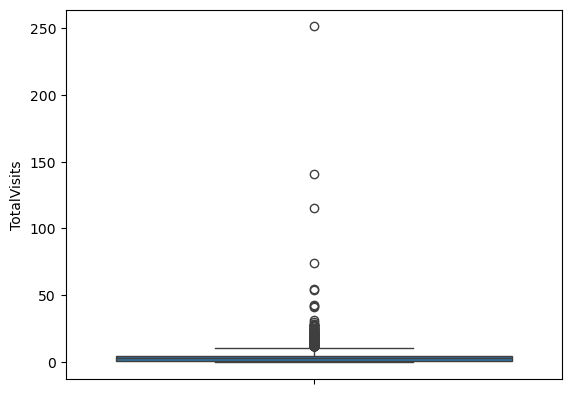

In [36]:
#Boxplot to check outliers
sns.boxplot(df['TotalVisits'])
plt.show()

In [37]:
#Outliers are present, so we can cap it
threshold1 = df['TotalVisits'].quantile(0.95)
df['TotalVisits'][df['TotalVisits'] >= threshold1] = threshold1

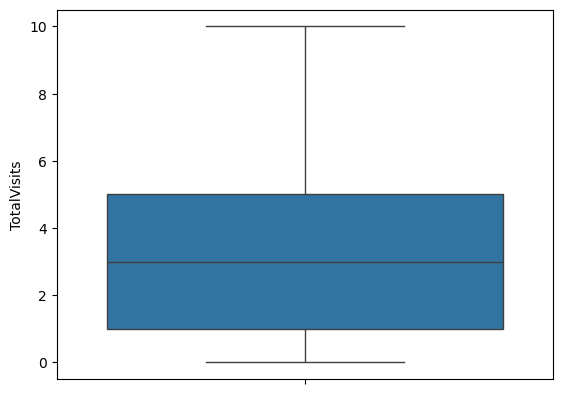

In [38]:
sns.boxplot(df['TotalVisits'])
plt.show()

<Axes: xlabel='Converted', ylabel='TotalVisits'>

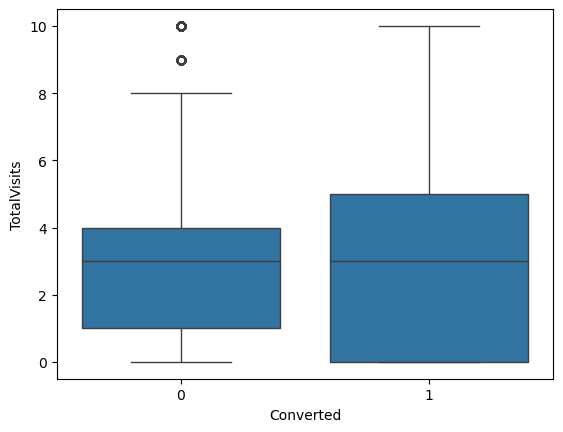

In [39]:
sns.boxplot(y='TotalVisits', x='Converted', data=df)

In [40]:
# Show the plot
plt.show()

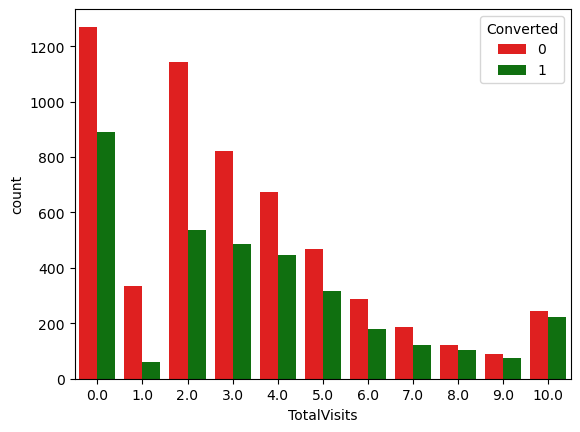

In [41]:
sns.countplot(x = "TotalVisits", hue = "Converted", data = df, palette={1: 'green', 0: 'red'})
plt.show()

#### People who have visited the website is more likely to get converted. However, the total counts of customers visiting the site more often is less

In [42]:
df['Total Time Spent on Website'].describe()

count    9074.000000
mean      482.887481
std       545.256560
min         0.000000
25%        11.000000
50%       246.000000
75%       922.750000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

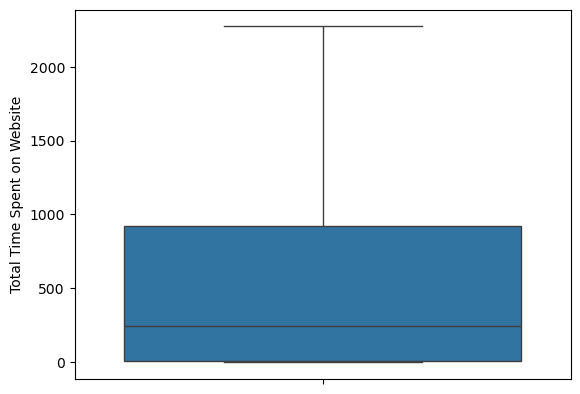

In [43]:
#Boxplot to check outliers
sns.boxplot(df['Total Time Spent on Website'])
plt.show()

<Axes: xlabel='Converted', ylabel='Total Time Spent on Website'>

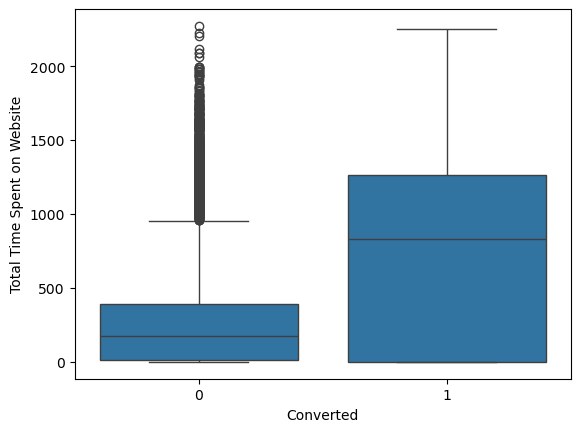

In [44]:
sns.boxplot(y = 'Total Time Spent on Website', x = 'Converted',data=df)

In [45]:
df['Page Views Per Visit'].describe()

count    9074.000000
mean        2.370151
std         2.160871
min         0.000000
25%         1.000000
50%         2.000000
75%         3.200000
max        55.000000
Name: Page Views Per Visit, dtype: float64

<Axes: ylabel='Page Views Per Visit'>

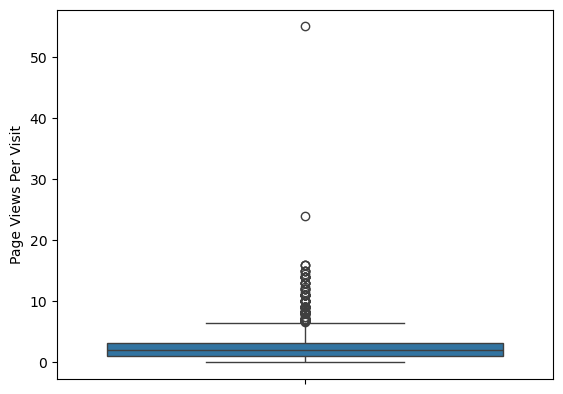

In [46]:
sns.boxplot(df['Page Views Per Visit'])

In [47]:
#Outliers are present, so we can cap it
threshold2 = df['Page Views Per Visit'].quantile(0.95)
df['Page Views Per Visit'][df['Page Views Per Visit'] >= threshold2] = threshold2

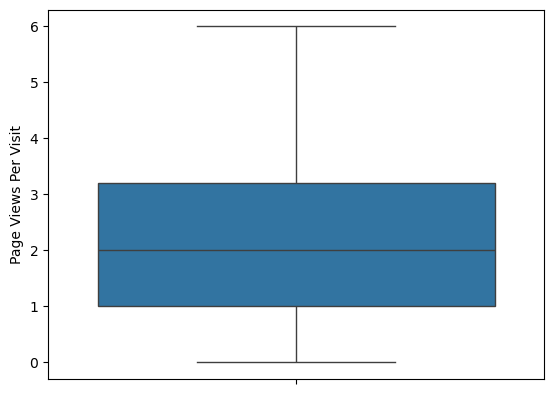

In [48]:
sns.boxplot(df['Page Views Per Visit'])
plt.show()

<Axes: xlabel='Converted', ylabel='Page Views Per Visit'>

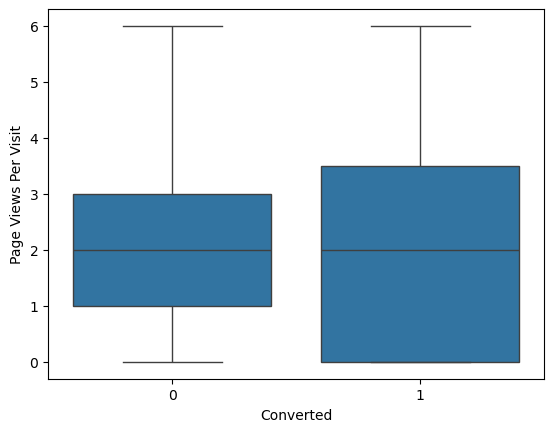

In [49]:
sns.boxplot(y = 'Page Views Per Visit', x = 'Converted', data = df)

In [50]:
df['Last Activity'].describe() 

count             9074
unique              17
top       Email Opened
freq              3432
Name: Last Activity, dtype: object

In [51]:
df['Last Activity'].value_counts()

Last Activity
Email Opened                    3432
SMS Sent                        2716
Olark Chat Conversation          972
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    312
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       90
Unsubscribed                      59
Had a Phone Conversation          25
View in browser link Clicked       6
Approached upfront                 5
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: count, dtype: int64

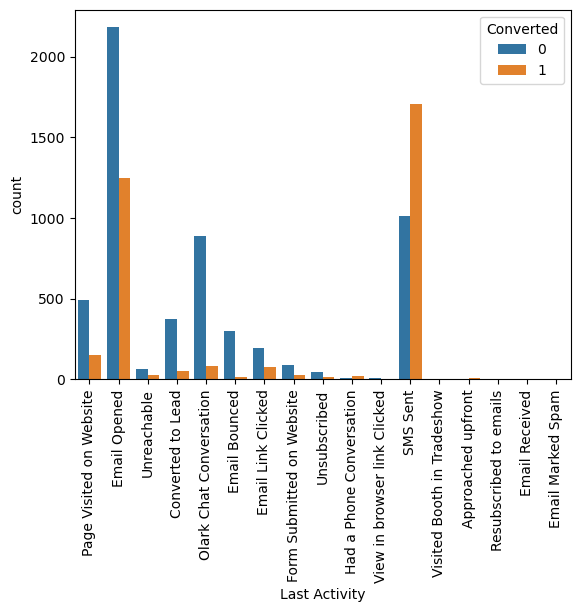

In [52]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [53]:
# We can club the last activities to "Others" which are having less data.
df['Last Activity'] = df['Last Activity'].replace(['Email Bounced','Form Submitted on Website','Unreachable', 'Unsubscribed' ,'View in browser link Clicked', 'Visited Booth in Tradeshow', 'Approached upfront', 'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Others')

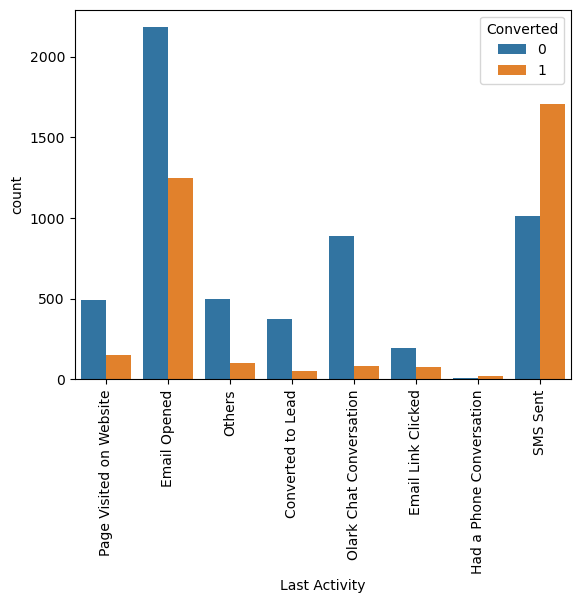

In [54]:
sns.countplot(x = "Last Activity", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

##### Most of the lead have their Email opened as their last activity. Conversion rate for leads with last activity as SMS Sent the highest. Leads to whom SMSes are sent are most likely to get converted

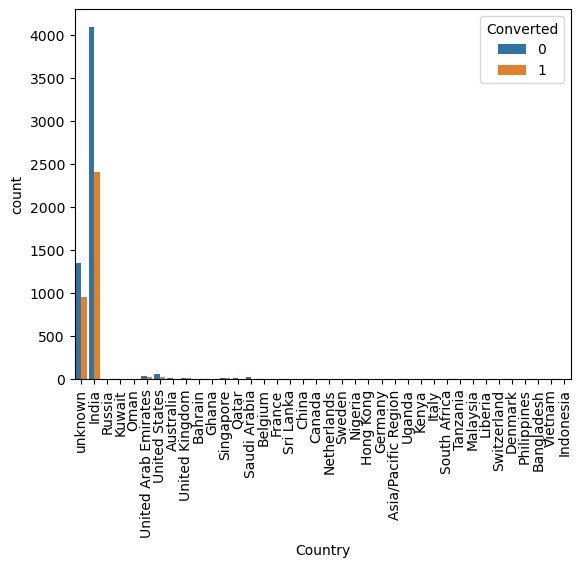

In [55]:
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

In [56]:
# Replace all countries except 'India' with 'Others'
df['Country'] = df['Country'].apply(lambda x: 'Others' if x != 'India' else x)

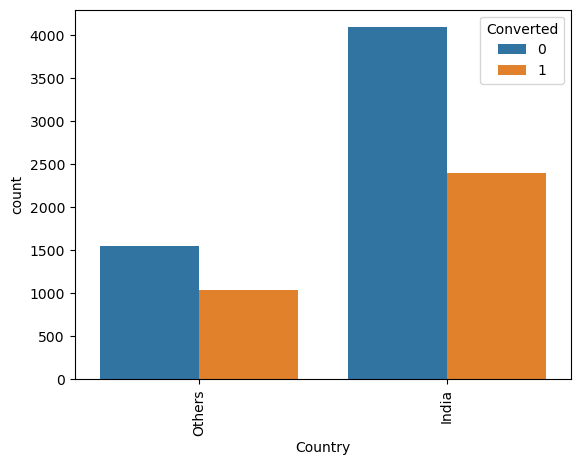

In [57]:
sns.countplot(x = "Country", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

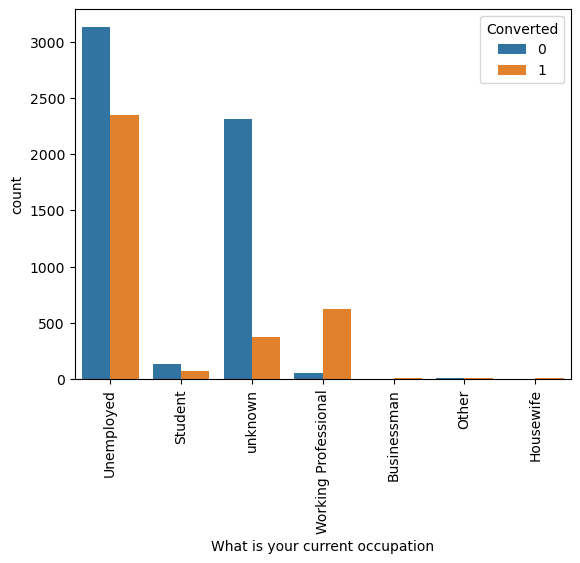

In [58]:
sns.countplot(x = "What is your current occupation", hue = "Converted", data = df)
plt.xticks(rotation = 90)
plt.show()

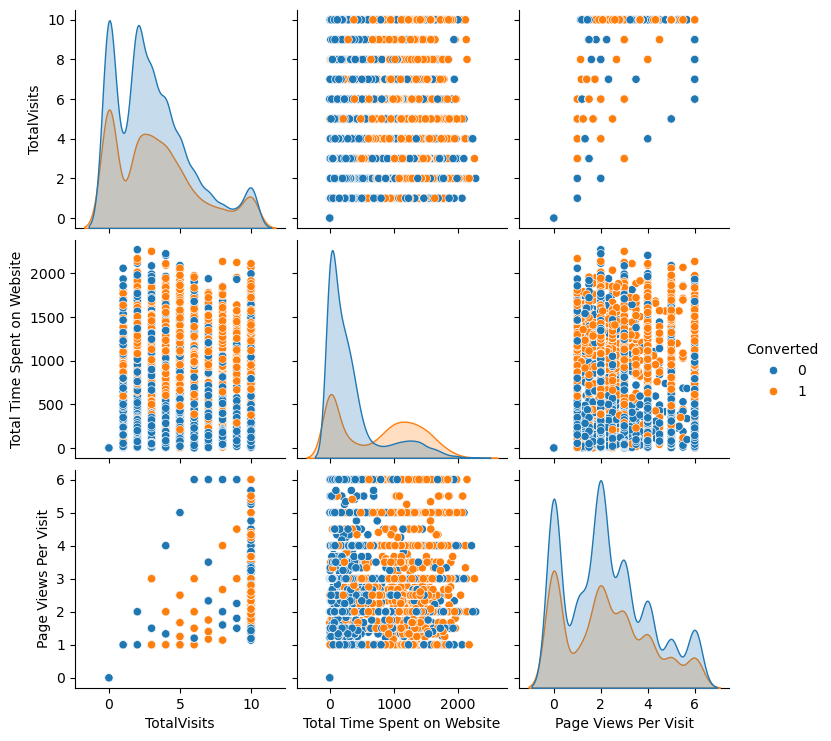

In [59]:
from matplotlib import pyplot as plt
import seaborn as sns

x_edu = df[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(x_edu,diag_kind='kde',hue='Converted')
plt.show()

## Data Preparation

In [60]:
from sklearn import preprocessing

In [61]:
label_encoder = preprocessing.LabelEncoder()
for i in objectcols:
    df[i]= label_encoder.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Number                                    9074 non-null   int64  
 1   Lead Origin                                    9074 non-null   int32  
 2   Lead Source                                    9074 non-null   int32  
 3   Do Not Email                                   9074 non-null   int32  
 4   Do Not Call                                    9074 non-null   int32  
 5   Converted                                      9074 non-null   int64  
 6   TotalVisits                                    9074 non-null   float64
 7   Total Time Spent on Website                    9074 non-null   int64  
 8   Page Views Per Visit                           9074 non-null   float64
 9   Last Activity                                  9074 non-n

#### Test Split

In [62]:
from sklearn.model_selection import train_test_split
x=df.drop(['Converted'],axis=1)
y=df['Converted']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [63]:
x.shape

(9074, 32)

In [64]:
x_test.shape

(2723, 32)

In [65]:
from sklearn.preprocessing import MinMaxScaler

In [66]:

# Scale the three numeric features
scaler = MinMaxScaler()
x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(x_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
x_train.head()


,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1943,640818,1,0,0,0,0.2,0.629827,0.333333,2,0,...,14,5,0,0,4,0,2.0,0,1,4
456,655437,0,7,0,0,0.2,0.024856,0.333333,4,0,...,25,5,0,0,6,7,2.0,0,0,8
6547,599571,1,0,0,0,0.5,0.173546,0.833333,7,0,...,14,3,0,0,4,0,4.0,0,1,12
8836,582488,0,4,0,0,0.4,0.730138,0.666667,2,0,...,8,5,0,0,3,3,2.0,0,1,8
6529,599679,1,4,0,0,0.5,0.292943,0.833333,7,0,...,19,2,0,0,3,3,4.0,0,1,12


In [67]:
x_train=pd.DataFrame(x_train,columns=x.columns)
x_test=pd.DataFrame(x_test,columns=x.columns)

In [68]:
x_train.head()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
1943,640818,1,0,0,0,0.2,0.629827,0.333333,2,0,...,14,5,0,0,4,0,2.0,0,1,4
456,655437,0,7,0,0,0.2,0.024856,0.333333,4,0,...,25,5,0,0,6,7,2.0,0,0,8
6547,599571,1,0,0,0,0.5,0.173546,0.833333,7,0,...,14,3,0,0,4,0,4.0,0,1,12
8836,582488,0,4,0,0,0.4,0.730138,0.666667,2,0,...,8,5,0,0,3,3,2.0,0,1,8
6529,599679,1,4,0,0,0.5,0.292943,0.833333,7,0,...,19,2,0,0,3,3,4.0,0,1,12


In [69]:
df.corr()

,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,1.000000,-0.015597,0.113073,-0.098898,0.012150,0.022830,0.048893,0.018360,0.066643,-0.132645,...,0.071771,-0.010737,NaN,NaN,0.054776,0.037702,-0.131423,NaN,-0.106875,-0.142533
Lead Origin,-0.015597,1.000000,0.026032,0.051802,0.007935,0.209646,0.133015,0.073991,0.187540,0.096719,...,-0.127831,-0.279403,NaN,NaN,-0.240699,-0.498498,0.075204,NaN,0.322579,0.042475
Lead Source,0.113073,0.026032,1.000000,-0.070057,0.014108,0.175751,-0.191882,-0.218538,-0.242396,0.034588,...,0.048974,-0.067878,NaN,NaN,-0.058574,0.288485,-0.053226,NaN,-0.407614,0.041720
Do Not Email,-0.098898,0.051802,-0.070057,1.000000,-0.004346,-0.140786,0.001856,-0.046192,0.022891,0.185832,...,0.041594,0.085720,NaN,NaN,0.074098,-0.034605,0.044815,NaN,0.058023,0.089838
Do Not Call,0.012150,0.007935,0.014108,-0.004346,1.000000,0.019024,0.006986,0.007029,-0.006350,-0.006720,...,-0.012735,-0.010016,NaN,NaN,-0.009886,-0.016194,-0.018401,NaN,-0.010145,0.001501
Converted,0.022830,0.209646,0.175751,-0.140786,0.019024,1.000000,0.050742,0.359261,0.000329,0.223826,...,0.030779,-0.528745,NaN,NaN,-0.381741,-0.133723,0.001054,NaN,-0.030860,0.208645
TotalVisits,0.048893,0.133015,-0.191882,0.001856,0.006986,0.050742,1.000000,0.361207,0.766567,0.077694,...,-0.045347,-0.099801,NaN,NaN,-0.078918,-0.351247,-0.015719,NaN,0.296274,-0.008354
Total Time Spent on Website,0.018360,0.073991,-0.218538,-0.046192,0.007029,0.359261,0.361207,1.000000,0.364735,0.088048,...,-0.023553,-0.237005,NaN,NaN,-0.162004,-0.243457,0.003684,NaN,0.177435,0.074532
Page Views Per Visit,0.066643,0.187540,-0.242396,0.022891,-0.006350,0.000329,0.766567,0.364735,1.000000,0.078135,...,-0.040893,-0.097764,NaN,NaN,-0.084807,-0.399793,0.027985,NaN,0.297421,0.006147
Last Activity,-0.132645,0.096719,0.034588,0.185832,-0.006720,0.223826,0.077694,0.088048,0.078135,1.000000,...,0.107185,-0.111038,NaN,NaN,-0.034389,-0.047177,0.098762,NaN,0.013598,0.777584


In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [71]:
#15 var
from sklearn.feature_selection import RFE
logreg=LogisticRegression()
rfe=RFE(logreg,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [72]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Number', False, 13),
 ('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 7),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', False, 10),
 ('How did you hear about X Education', False, 11),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', False, 9),
 ('Magazine', False, 18),
 ('Newspaper Article', False, 12),
 ('X Education Forums', False, 8),
 ('Newspaper', True, 1),
 ('Digital Advertisement', False, 2),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 14),
 ('Tags', False, 3),
 ('Lead Quality', True, 1),
 ('Update me on Supply Chain Content', False, 15),
 ('Get updates on DM Content', False, 16),
 ('Lead Profile', True, 1),
 ('City', False, 4),
 ('Asymmetrique Activity Index', False, 5)

In [73]:
# cols which are selected
col=x_train.columns[rfe.support_]

In [74]:
print(col)

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Newspaper',
       'Through Recommendations', 'Lead Quality', 'Lead Profile',
       'A free copy of Mastering The Interview'],
      dtype='object')


In [75]:
import statsmodels.api as sm

In [76]:
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6323
Model Family:                Binomial   Df Model:                           27
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2354.0
Date:                Tue, 18 Mar 2025   Deviance:                       4708.0
Time:                        01:37:35   Pearson chi2:                 7.19e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4404
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.3796      1.167     -4.611      0.000      -7.666      -3.093
Lead Number                                     2.76e-06   1.66e-06      1.664      0.096   -4.91e-07    6.01e-06
Lead Origin                                       0.3685      0.077      4.804      0.000       0.218       0.519
Lead Source                                       0.2201      0.024      8.996      0.000       0.172       0.268
Do Not Email                                     -1.6508      0.172     -9.573      0.000      -1.989      -1.313
Do Not Call                                      19.8819   2.93e+04      0.001      0.999   -5.73e+04    5.74e+04
TotalVisits                                       0.8704      0.208      4.182      0.000       0.462       1.278
Total Time Spent on Website                       4.4683      0.180     24.802      0.000       4.115       4.821
Page Views Per Visit                             -1.6772      0.214     -7.850      0.000      -2.096      -1.258
Last Activity                                     0.1595      0.027      5.841      0.000       0.106       0.213
Country                                           0.8972      0.126      7.145      0.000       0.651       1.143
Specialization                                   -0.0119      0.009     -1.384      0.166      -0.029       0.005
How did you hear about X Education                0.0351      0.024      1.465      0.143      -0.012       0.082
What is your current occupation                   0.5917      0.106      5.600      0.000       0.385       0.799
What matters most to you in choosing a course    -0.6634      0.095     -7.019      0.000      -0.849      -0.478
Search                                           -0.3255      0.830     -0.392      0.695      -1.953       1.302
Magazine                                       6.506e-09   1.17e-05      0.001      1.000   -2.29e-05    2.29e-05
Newspaper Article                                20.4155   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.6421   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.2006   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.5550      1.675     -0.331      0.740      -3.838       2.728
Through Recommendations                           1.7186      1.514      1.135      0.256      -1.249       4.686
Receive More Updates About Our Courses        -4.767e-11   3.65e-08     -0.001      0.999   -7.15e-08    7.14e-08
Tags                                              0.0982      0.006     16.774      0.000       0.087       0.110
Lead 

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [78]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
0,Lead Number,160.46
12,What is your current occupation,142.05
26,Lead Profile,67.94
11,How did you hear about X Education,20.64
31,Last Notable Activity,17.72
13,What matters most to you in choosing a course,14.96
8,Last Activity,11.07
23,Lead Quality,10.70
22,Tags,8.91
10,Specialization,8.23


In [79]:
x_train.drop(['Lead Number','What is your current occupation'], axis = 1, inplace = True)

In [80]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2371.6
Date:                Tue, 18 Mar 2025   Deviance:                       4743.2
Time:                        01:37:49   Pearson chi2:                 7.30e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4373
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.3025      0.324     -4.021      0.000      -1.937      -0.668
Lead Origin                                       0.3738      0.076      4.897      0.000       0.224       0.523
Lead Source                                       0.2269      0.024      9.347      0.000       0.179       0.274
Do Not Email                                     -1.6816      0.171     -9.861      0.000      -2.016      -1.347
Do Not Call                                      19.9490   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                       0.8488      0.207      4.100      0.000       0.443       1.255
Total Time Spent on Website                       4.4692      0.180     24.876      0.000       4.117       4.821
Page Views Per Visit                             -1.6429      0.212     -7.742      0.000      -2.059      -1.227
Last Activity                                     0.1595      0.027      5.864      0.000       0.106       0.213
Country                                           0.8914      0.125      7.142      0.000       0.647       1.136
Specialization                                   -0.0120      0.008     -1.420      0.156      -0.029       0.005
How did you hear about X Education                0.0349      0.024      1.460      0.144      -0.012       0.082
What matters most to you in choosing a course    -0.2819      0.064     -4.381      0.000      -0.408      -0.156
Search                                           -0.4287      0.836     -0.513      0.608      -2.067       1.209
Magazine                                       1.223e-10   2.42e-07      0.001      1.000   -4.75e-07    4.75e-07
Newspaper Article                                20.2350   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.6071   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.1669   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.6591      1.698     -0.388      0.698      -3.987       2.669
Through Recommendations                           2.0886      1.481      1.410      0.158      -0.814       4.991
Receive More Updates About Our Courses        -7.144e-12   1.15e-08     -0.001      1.000   -2.25e-08    2.25e-08
Tags                                              0.1011      0.006     17.383      0.000       0.090       0.112
Lead Quality                                     -0.6726      0.031    -22.045      0.000      -0.732      -0.613
Update me on Supply Chain Content              -1.15e-14   1.62e-11     -0.001      0.999   -3.18e-11    3.17e-11
Get u

In [81]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [82]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,Lead Profile,42.64
10,How did you hear about X Education,18.35
29,Last Notable Activity,17.10
7,Last Activity,10.85
21,Lead Quality,10.68
20,Tags,8.31
9,Specialization,8.07
26,Asymmetrique Activity Index,7.63
6,Page Views Per Visit,7.37
4,TotalVisits,5.99


In [83]:
x_train.drop(['Lead Profile','How did you hear about X Education'], axis = 1, inplace = True)

In [84]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2377.7
Date:                Tue, 18 Mar 2025   Deviance:                       4755.3
Time:                        01:38:01   Pearson chi2:                 7.32e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4362
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.7676      0.230     -7.684      0.000      -2.218      -1.317
Lead Origin                                       0.3630      0.076      4.794      0.000       0.215       0.511
Lead Source                                       0.2284      0.024      9.416      0.000       0.181       0.276
Do Not Email                                     -1.6657      0.170     -9.774      0.000      -2.000      -1.332
Do Not Call                                      19.7449   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                       0.8479      0.207      4.100      0.000       0.443       1.253
Total Time Spent on Website                       4.4764      0.180     24.923      0.000       4.124       4.828
Page Views Per Visit                             -1.6525      0.212     -7.798      0.000      -2.068      -1.237
Last Activity                                     0.1525      0.027      5.619      0.000       0.099       0.206
Country                                           0.9170      0.124      7.371      0.000       0.673       1.161
Specialization                                   -0.0122      0.008     -1.456      0.145      -0.029       0.004
What matters most to you in choosing a course    -0.3956      0.038    -10.396      0.000      -0.470      -0.321
Search                                           -0.4696      0.845     -0.556      0.578      -2.125       1.186
Magazine                                      -1.821e-10   2.17e-07     -0.001      0.999   -4.26e-07    4.26e-07
Newspaper Article                                20.1297   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.6216   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.2377   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.6086      1.669     -0.365      0.715      -3.880       2.663
Through Recommendations                           1.9936      1.486      1.342      0.180      -0.918       4.906
Receive More Updates About Our Courses         2.912e-11   2.84e-08      0.001      0.999   -5.56e-08    5.57e-08
Tags                                              0.1015      0.006     17.537      0.000       0.090       0.113
Lead Quality                                     -0.7069      0.029    -24.537      0.000      -0.763      -0.650
Update me on Supply Chain Content              1.493e-14   1.24e-11      0.001      0.999   -2.42e-11    2.42e-11
Get updates on DM Content                     -2.031e-15   3.25e-12     -0.001      1.000   -6.38e-12    6.37e-12
City 

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [86]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
27,Last Notable Activity,16.11
7,Last Activity,10.78
19,Tags,8.15
20,Lead Quality,7.74
9,Specialization,7.27
6,Page Views Per Visit,7.24
24,Asymmetrique Activity Index,6.98
4,TotalVisits,5.93
23,City,4.60
1,Lead Source,3.72


In [87]:
x_train.drop(['Last Notable Activity','Last Activity'], axis = 1, inplace = True)

In [88]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2456.1
Date:                Tue, 18 Mar 2025   Deviance:                       4912.1
Time:                        01:38:18   Pearson chi2:                 7.31e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.4222
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.1610      0.212     -5.477      0.000      -1.576      -0.745
Lead Origin                                       0.3947      0.074      5.323      0.000       0.249       0.540
Lead Source                                       0.2292      0.024      9.633      0.000       0.183       0.276
Do Not Email                                     -1.3899      0.166     -8.367      0.000      -1.716      -1.064
Do Not Call                                      19.4144   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                       0.8895      0.203      4.379      0.000       0.491       1.288
Total Time Spent on Website                       4.5067      0.177     25.471      0.000       4.160       4.853
Page Views Per Visit                             -1.5674      0.209     -7.496      0.000      -1.977      -1.158
Country                                           0.9336      0.121      7.688      0.000       0.696       1.172
Specialization                                   -0.0100      0.008     -1.215      0.224      -0.026       0.006
What matters most to you in choosing a course    -0.4336      0.037    -11.651      0.000      -0.507      -0.361
Search                                           -0.5659      0.856     -0.661      0.509      -2.244       1.112
Magazine                                       5.087e-12   3.71e-08      0.000      1.000   -7.27e-08    7.27e-08
Newspaper Article                                19.6799   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -40.4497   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.8186   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.5426      1.941     -0.280      0.780      -4.347       3.262
Through Recommendations                           1.5466      1.480      1.045      0.296      -1.354       4.448
Receive More Updates About Our Courses        -2.012e-14    1.5e-11     -0.001      0.999   -2.93e-11    2.93e-11
Tags                                              0.1101      0.006     19.264      0.000       0.099       0.121
Lead Quality                                     -0.7206      0.029    -25.191      0.000      -0.777      -0.665
Update me on Supply Chain Content             -8.333e-16   3.63e-12     -0.000      1.000   -7.11e-12    7.11e-12
Get updates on DM Content                              0          0        nan        nan           0           0
City                                             -0.0128      0.021     -0.602      0.547      -0.055       0.029
Asymm

In [89]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [90]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
18,Tags,7.73
19,Lead Quality,7.62
6,Page Views Per Visit,7.22
8,Specialization,7.17
23,Asymmetrique Activity Index,6.59
4,TotalVisits,5.89
22,City,4.56
1,Lead Source,3.70
0,Lead Origin,3.26
7,Country,2.94


In [91]:
x_train.drop(['Tags','Lead Quality','Specialization','Country'], axis = 1, inplace = True)

In [92]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6333
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3098.8
Date:                Tue, 18 Mar 2025   Deviance:                       6197.5
Time:                        01:38:32   Pearson chi2:                 6.38e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2925
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.4449      0.136    -10.632      0.000      -1.711      -1.179
Lead Origin                                       0.5842      0.060      9.759      0.000       0.467       0.702
Lead Source                                       0.2721      0.020     13.595      0.000       0.233       0.311
Do Not Email                                     -1.3538      0.149     -9.066      0.000      -1.646      -1.061
Do Not Call                                      20.0377   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                       0.4829      0.174      2.773      0.006       0.142       0.824
Total Time Spent on Website                       4.2656      0.149     28.534      0.000       3.973       4.559
Page Views Per Visit                             -1.5453      0.171     -9.054      0.000      -1.880      -1.211
What matters most to you in choosing a course    -0.5268      0.029    -18.118      0.000      -0.584      -0.470
Search                                           -0.7148      0.796     -0.898      0.369      -2.276       0.846
Magazine                                      -1.223e-10   1.78e-07     -0.001      0.999   -3.49e-07    3.49e-07
Newspaper Article                                20.6637   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.5357   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.6052   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.2797      1.521     -0.184      0.854      -3.261       2.701
Through Recommendations                           1.8088      1.422      1.272      0.204      -0.979       4.597
Receive More Updates About Our Courses         1.211e-15   1.15e-12      0.001      0.999   -2.25e-12    2.25e-12
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
City                                             -0.0197      0.018     -1.123      0.262      -0.054       0.015
Asymmetrique Activity Index                      -0.0194      0.029     -0.662      0.508      -0.077       0.038
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.3110      0.081     -3.860      0.000      -0.469      -0.153
=================================================================================================================
"""

In [93]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [94]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Page Views Per Visit,6.53
4,TotalVisits,5.78
19,Asymmetrique Activity Index,5.02
18,City,3.37
1,Lead Source,3.07
0,Lead Origin,3.03
11,X Education Forums,2.62
5,Total Time Spent on Website,2.11
21,A free copy of Mastering The Interview,2.06
10,Newspaper Article,2.00


In [95]:
x_train.drop(['Asymmetrique Activity Index','City'], axis = 1, inplace = True)

In [96]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3099.6
Date:                Tue, 18 Mar 2025   Deviance:                       6199.2
Time:                        01:38:44   Pearson chi2:                 6.36e+03
No. Iterations:                    20   Pseudo R-squ. (CS):             0.2923
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5687      0.087    -18.056      0.000      -1.739      -1.398
Lead Origin                                       0.6071      0.056     10.934      0.000       0.498       0.716
Lead Source                                       0.2674      0.019     13.772      0.000       0.229       0.305
Do Not Email                                     -1.3582      0.149     -9.096      0.000      -1.651      -1.066
Do Not Call                                      20.1024   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
TotalVisits                                       0.5048      0.173      2.913      0.004       0.165       0.844
Total Time Spent on Website                       4.2683      0.149     28.571      0.000       3.976       4.561
Page Views Per Visit                             -1.5290      0.169     -9.021      0.000      -1.861      -1.197
What matters most to you in choosing a course    -0.5366      0.028    -19.350      0.000      -0.591      -0.482
Search                                           -0.7511      0.796     -0.944      0.345      -2.311       0.809
Magazine                                      -1.754e-12   2.54e-09     -0.001      0.999   -4.98e-09    4.98e-09
Newspaper Article                                20.6286   2.92e+04      0.001      0.999   -5.73e+04    5.73e+04
X Education Forums                              -41.4443   4.13e+04     -0.001      0.999   -8.11e+04     8.1e+04
Newspaper                                       -23.6936   2.92e+04     -0.001      0.999   -5.73e+04    5.73e+04
Digital Advertisement                            -0.3308      1.513     -0.219      0.827      -3.296       2.635
Through Recommendations                           1.7887      1.420      1.259      0.208      -0.995       4.572
Receive More Updates About Our Courses                 0          0        nan        nan           0           0
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.2957      0.079     -3.721      0.000      -0.451      -0.140
=================================================================================================================
"""

In [97]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [98]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
6,Page Views Per Visit,6.29
4,TotalVisits,5.77
11,X Education Forums,2.62
0,Lead Origin,2.59
5,Total Time Spent on Website,2.03
10,Newspaper Article,2.00
19,A free copy of Mastering The Interview,1.99
1,Lead Source,1.91
14,Through Recommendations,1.38
13,Digital Advertisement,1.34


In [99]:
x_train.drop(['Do Not Call','Magazine','Newspaper Article','X Education Forums'], axis = 1, inplace = True)

In [100]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3100.4
Date:                Tue, 18 Mar 2025   Deviance:                       6200.8
Time:                        01:38:59   Pearson chi2:                 6.37e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.2922
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5689      0.087    -18.063      0.000      -1.739      -1.399
Lead Origin                                       0.6072      0.056     10.936      0.000       0.498       0.716
Lead Source                                       0.2675      0.019     13.776      0.000       0.229       0.306
Do Not Email                                     -1.3590      0.149     -9.101      0.000      -1.652      -1.066
TotalVisits                                       0.5073      0.173      2.929      0.003       0.168       0.847
Total Time Spent on Website                       4.2700      0.149     28.582      0.000       3.977       4.563
Page Views Per Visit                             -1.5274      0.169     -9.016      0.000      -1.859      -1.195
What matters most to you in choosing a course    -0.5373      0.028    -19.377      0.000      -0.592      -0.483
Search                                           -0.8112      0.794     -1.022      0.307      -2.366       0.744
Newspaper                                       -22.6981   1.77e+04     -0.001      0.999   -3.48e+04    3.47e+04
Digital Advertisement                            -0.7556      1.390     -0.544      0.587      -3.481       1.969
Through Recommendations                           1.4933      1.309      1.141      0.254      -1.072       4.058
Receive More Updates About Our Courses                 0          0        nan        nan           0           0
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.2977      0.079     -3.746      0.000      -0.453      -0.142
=================================================================================================================
"""

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [102]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Page Views Per Visit,6.28
3,TotalVisits,5.77
0,Lead Origin,2.59
4,Total Time Spent on Website,2.03
15,A free copy of Mastering The Interview,1.98
1,Lead Source,1.91
6,What matters most to you in choosing a course,1.29
10,Through Recommendations,1.22
7,Search,1.19
2,Do Not Email,1.09


In [103]:
x_train.drop('Newspaper', axis = 1, inplace = True)

In [104]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6339
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3102.7
Date:                Tue, 18 Mar 2025   Deviance:                       6205.3
Time:                        01:39:12   Pearson chi2:                 6.37e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2917
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5695      0.087    -18.075      0.000      -1.740      -1.399
Lead Origin                                       0.6054      0.056     10.907      0.000       0.497       0.714
Lead Source                                       0.2682      0.019     13.816      0.000       0.230       0.306
Do Not Email                                     -1.3577      0.149     -9.095      0.000      -1.650      -1.065
TotalVisits                                       0.4926      0.173      2.846      0.004       0.153       0.832
Total Time Spent on Website                       4.2618      0.149     28.555      0.000       3.969       4.554
Page Views Per Visit                             -1.5163      0.169     -8.958      0.000      -1.848      -1.185
What matters most to you in choosing a course    -0.5367      0.028    -19.366      0.000      -0.591      -0.482
Search                                           -0.8054      0.794     -1.015      0.310      -2.361       0.750
Digital Advertisement                            -0.7507      1.390     -0.540      0.589      -3.475       1.973
Through Recommendations                           1.4931      1.308      1.141      0.254      -1.071       4.057
Receive More Updates About Our Courses                 0          0        nan        nan           0           0
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.2931      0.079     -3.691      0.000      -0.449      -0.137
=================================================================================================================
"""

In [105]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [106]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Page Views Per Visit,6.27
3,TotalVisits,5.76
0,Lead Origin,2.59
4,Total Time Spent on Website,2.03
14,A free copy of Mastering The Interview,1.98
1,Lead Source,1.91
6,What matters most to you in choosing a course,1.29
9,Through Recommendations,1.22
7,Search,1.19
2,Do Not Email,1.09


In [107]:
x_train.drop(['Digital Advertisement','Search'], axis = 1, inplace = True)

In [108]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6341
Model Family:                Binomial   Df Model:                            9
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3103.4
Date:                Tue, 18 Mar 2025   Deviance:                       6206.8
Time:                        01:39:21   Pearson chi2:                 6.37e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2915
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5690      0.087    -18.075      0.000      -1.739      -1.399
Lead Origin                                       0.6039      0.055     10.884      0.000       0.495       0.713
Lead Source                                       0.2686      0.019     13.843      0.000       0.231       0.307
Do Not Email                                     -1.3560      0.149     -9.084      0.000      -1.649      -1.063
TotalVisits                                       0.4809      0.173      2.785      0.005       0.142       0.819
Total Time Spent on Website                       4.2612      0.149     28.561      0.000       3.969       4.554
Page Views Per Visit                             -1.5135      0.169     -8.945      0.000      -1.845      -1.182
What matters most to you in choosing a course    -0.5371      0.028    -19.380      0.000      -0.591      -0.483
Through Recommendations                           0.8311      1.115      0.745      0.456      -1.354       3.016
Receive More Updates About Our Courses                 0          0        nan        nan           0           0
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.2893      0.079     -3.646      0.000      -0.445      -0.134
=================================================================================================================
"""

In [109]:
x_train.drop(['Through Recommendations'], axis = 1, inplace = True)

In [110]:
# Refit the model with the new set of features
x_train_sm=sm.add_constant(x_train)
logm1=sm.GLM(y_train,x_train_sm,family=sm.families.Binomial())
res=logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6342
Model Family:                Binomial   Df Model:                            8
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3103.7
Date:                Tue, 18 Mar 2025   Deviance:                       6207.3
Time:                        01:39:24   Pearson chi2:                 6.37e+03
No. Iterations:                     5   Pseudo R-squ. (CS):             0.2914
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -1.5687      0.087    -18.075      0.000      -1.739      -1.399
Lead Origin                                       0.6042      0.055     10.889      0.000       0.495       0.713
Lead Source                                       0.2684      0.019     13.839      0.000       0.230       0.306
Do Not Email                                     -1.3566      0.149     -9.089      0.000      -1.649      -1.064
TotalVisits                                       0.4866      0.173      2.820      0.005       0.148       0.825
Total Time Spent on Website                       4.2600      0.149     28.562      0.000       3.968       4.552
Page Views Per Visit                             -1.5173      0.169     -8.972      0.000      -1.849      -1.186
What matters most to you in choosing a course    -0.5369      0.028    -19.377      0.000      -0.591      -0.483
Receive More Updates About Our Courses                 0          0        nan        nan           0           0
Update me on Supply Chain Content                      0          0        nan        nan           0           0
Get updates on DM Content                              0          0        nan        nan           0           0
I agree to pay the amount through cheque               0          0        nan        nan           0           0
A free copy of Mastering The Interview           -0.2880      0.079     -3.631      0.000      -0.443      -0.133
=================================================================================================================
"""

In [111]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [112]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
5,Page Views Per Visit,6.26
3,TotalVisits,5.72
0,Lead Origin,2.59
4,Total Time Spent on Website,2.03
11,A free copy of Mastering The Interview,1.98
1,Lead Source,1.91
6,What matters most to you in choosing a course,1.29
2,Do Not Email,1.09
7,Receive More Updates About Our Courses,NaN
8,Update me on Supply Chain Content,NaN


### VIF values are good and p value is below 0.05, so we can fix the model

# Creating Prediction

In [113]:
# Predicting the probabilities on the train set
y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

1943    0.735382
456     0.167509
6547    0.177360
8836    0.819116
6529    0.511960
7798    0.253515
2349    0.484068
5057    0.748445
3954    0.082166
4523    0.879801
dtype: float64

In [114]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.73538195, 0.16750881, 0.17736041, 0.81911638, 0.51195985,
       0.253515  , 0.48406779, 0.74844514, 0.08216647, 0.87980102])

In [115]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.735382
1,0,0.167509
2,0,0.177360
3,0,0.819116
4,1,0.511960


In [116]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.735382,1
1,0,0.167509,0
2,0,0.177360,0
3,0,0.819116,1
4,1,0.511960,1


#  Model Evaluation

In [117]:
# Importing metrics from sklearn for evaluation
from sklearn import metrics

In [118]:
# Creating confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3488,  489],
       [ 928, 1446]], dtype=int64)

In [119]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.7768855298378208

## That is around 78% accuracy

In [120]:
# Substituting the value of true positive
TP = confusion[1,1]
# Substituting the value of true negatives
TN = confusion[0,0]
# Substituting the value of false positives
FP = confusion[0,1] 
# Substituting the value of false negatives
FN = confusion[1,0]

In [121]:
# Calculating the sensitivity
TP/(TP+FN)

0.6090985678180286

In [122]:
# Calculating the specificity
TN/(TN+FP)

0.8770429972340961

# With a cut off as 0.5 we have accuracy of 78%, sensitivity of 61% and Specificity of 88%

# Optimise Cut off (ROC Curve)

In [123]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [124]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob, drop_intermediate = False )

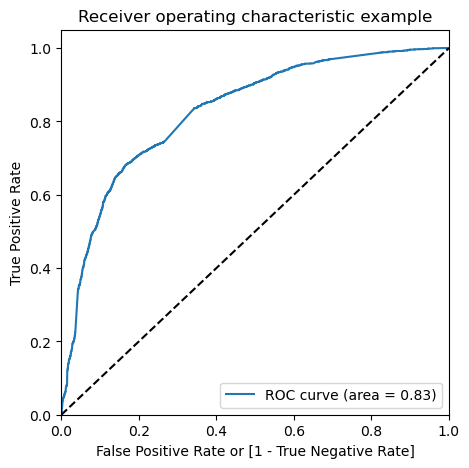

In [125]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

### The area under ROC curve is 0.83 which is a good value

In [126]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.735382,1,1,1,1,1,1,1,1,1,0,0
1,0,0.167509,0,1,1,0,0,0,0,0,0,0,0
2,0,0.177360,0,1,1,0,0,0,0,0,0,0,0
3,0,0.819116,1,1,1,1,1,1,1,1,1,1,0
4,1,0.511960,1,1,1,1,1,1,1,0,0,0,0


In [127]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.373799,1.000000,0.000000
0.1,0.1,0.567785,0.964617,0.330903
0.2,0.2,0.642733,0.911542,0.482273
0.3,0.3,0.715793,0.847094,0.637415
0.4,0.4,0.774209,0.685762,0.827005
0.5,0.5,0.776886,0.609099,0.877043
0.6,0.6,0.764761,0.529065,0.905456
0.7,0.7,0.746654,0.424179,0.939150
0.8,0.8,0.680680,0.197136,0.969324
0.9,0.9,0.639427,0.041281,0.996480


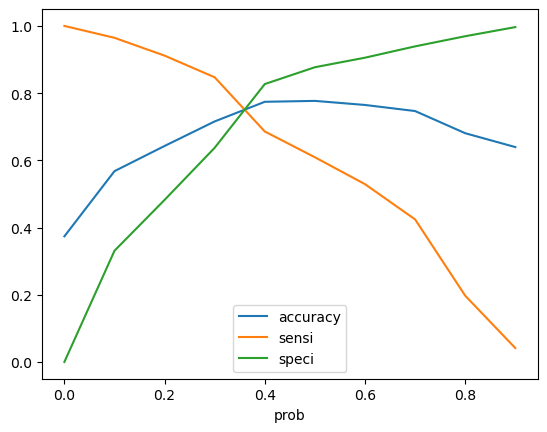

In [128]:
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

### From graph it is visible that optimal cut off is at 0.35

In [129]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.735382,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.167509,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.177360,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.819116,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.511960,1,1,1,1,1,1,1,0,0,0,0,1


In [130]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7559439458353016

In [131]:
# Creating confusion matrix 
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3083,  894],
       [ 656, 1718]], dtype=int64)

In [132]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [133]:
# Calculating the sensitivity
TP/(TP+FN)

0.7236731255265375

In [134]:
# Calculating the specificity
TN/(TN+FP)

0.7752074427960775

## With a cut off of 0.35, we have accuracy of 75%, sensitivity of 72% and specificity of 77%

## Precision-Recall

In [135]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3488,  489],
       [ 928, 1446]], dtype=int64)

In [136]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7472868217054264

In [137]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.6090985678180286

#### with the cutoff 0.35, we have precision around 75% and recall around 61% 

### Precision and recall tradeoff

In [138]:
from sklearn.metrics import precision_recall_curve

In [139]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       0
 1       0
 2       0
 3       0
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [140]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

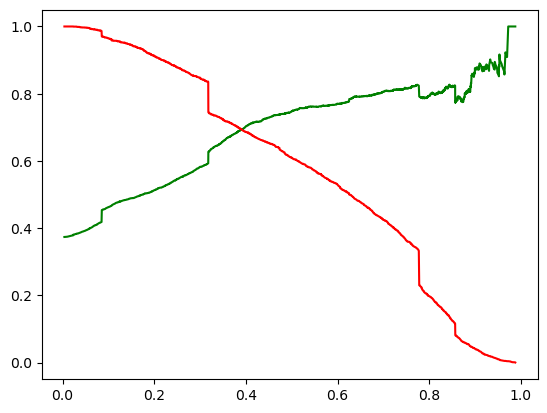

In [141]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [142]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.41 else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.735382,1,1,1,1,1,1,1,1,1,0,0,1
1,0,0.167509,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.177360,0,1,1,0,0,0,0,0,0,0,0,0
3,0,0.819116,1,1,1,1,1,1,1,1,1,1,0,1
4,1,0.511960,1,1,1,1,1,1,1,0,0,0,0,1


In [143]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.7770429853566367

In [144]:
# Creating confusion matrix again
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusion2

array([[3320,  657],
       [ 759, 1615]], dtype=int64)

In [145]:
# Substituting the value of true positive
TP = confusion2[1,1]
# Substituting the value of true negatives
TN = confusion2[0,0]
# Substituting the value of false positives
FP = confusion2[0,1] 
# Substituting the value of false negatives
FN = confusion2[1,0]

In [146]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7108274647887324

In [147]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.6802864363942712

#### with the cutoff 0.41 we have precision 71% and recall 68%